Matplotlib is building the font cache; this may take a moment.


0       0.102740
1       0.007534
2       0.102740
3       0.034932
4       0.028082
          ...   
1455    0.054110
1456    0.050000
1457    0.034932
1458    0.154110
1459    0.068493
Name: EncodedNeighborhood_Freq, Length: 1460, dtype: float64
              MSSubClass   LotArea  YearBuilt  YearRemodAdd  GrLivArea  \
MSSubClass      1.000000 -0.139781   0.027850      0.040581   0.074853   
LotArea        -0.139781  1.000000   0.014228      0.013788   0.263116   
YearBuilt       0.027850  0.014228   1.000000      0.592855   0.199010   
YearRemodAdd    0.040581  0.013788   0.592855      1.000000   0.287389   
GrLivArea       0.074853  0.263116   0.199010      0.287389   1.000000   
OverallQual     0.032628  0.105806   0.572323      0.550684   0.593007   
TotalBsmtSF    -0.238518  0.260833   0.391452      0.291066   0.454868   
1stFlrSF       -0.251758  0.299475   0.281986      0.240379   0.566024   
2ndFlrSF        0.307886  0.050986   0.010308      0.140024   0.687501   
PoolArea    

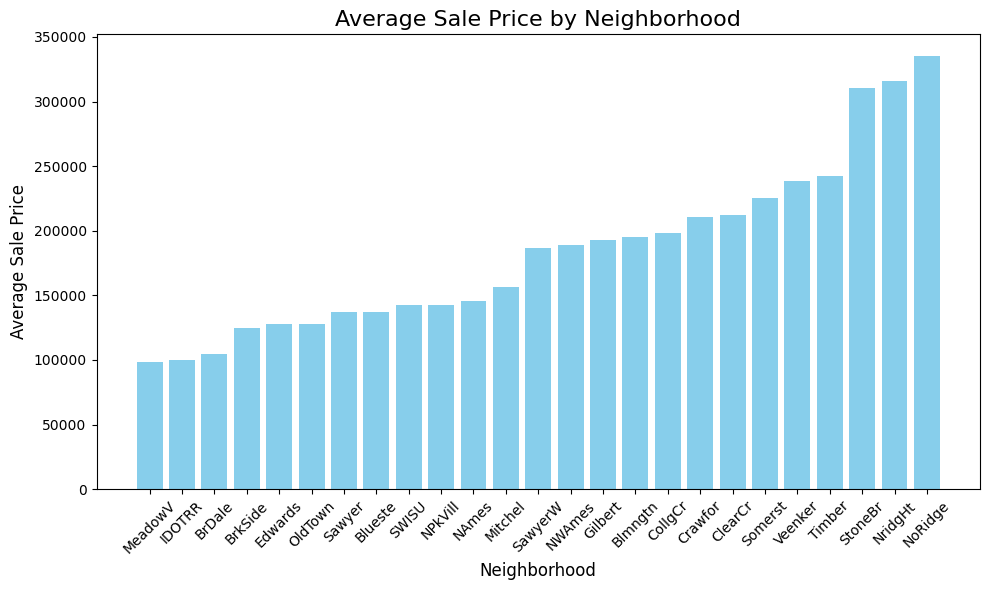

<Figure size 1200x600 with 0 Axes>

<class 'NameError'>: name 'grouped2' is not defined

In [1]:
# Import helpful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# print(home_data.corr(numeric_only=True))
# print(X.describe())

# Group by Exterior1st and calculate average SalePrice

exterQual_mapping = {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
home_data['EncodedExteriorQual'] = home_data["ExterQual"].map(exterQual_mapping)

# Calculate neighborhood frequencies
neighborhood_frequencies = home_data['Neighborhood'].value_counts(normalize=True)

# Map frequencies to neighborhoods
home_data['EncodedNeighborhood_Freq'] = home_data['Neighborhood'].map(neighborhood_frequencies)

print(home_data['EncodedNeighborhood_Freq'])
functional_mapping = {
    'Sal': 1,  # Lowest functionality
    'Sev': 2,
    'Maj2': 3,
    'Maj1': 4,
    'Mod': 5,
    'Min2': 6,
    'Min1': 7,
    'Typ': 8   # Highest functionality
}
home_data['EncodedFunctional'] = home_data["Functional"].map(functional_mapping)
home_data['LotArea_Binned'] = pd.cut(home_data['LotArea'], 
                                bins=[0, 5000, 10000, 20000, 50000, np.inf], 
                                labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

# Ordinal encoding
size_mapping = {'Very Small': 1, 'Small': 2, 'Medium': 3, 'Large': 4, 'Very Large': 5}
home_data['LotArea_Encoded'] = home_data['LotArea_Binned'].map(size_mapping)

home_data = pd.get_dummies(home_data, columns=['PavedDrive'], drop_first=False)

# Create X (After completing the exercise, you can return to modify this line!)
columns = ['MSSubClass', 'LotArea_Encoded', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 
            '1stFlrSF', '2ndFlrSF', 'EncodedExteriorQual', 'EncodedNeighborhood_Freq', 'SalePrice', "Street" ]

features = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 
            '1stFlrSF', '2ndFlrSF', 'PoolArea', 'TotRmsAbvGrd', 'OpenPorchSF', 'SalePrice', "Street"]
# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()
print(X.corr(numeric_only=True))


# Group by Neighborhood and calculate mean SalePrice
neighborhood_summary = home_data.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Bar plot: Average SalePrice by Neighborhood
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_summary.index, neighborhood_summary.values, color='skyblue')
plt.title('Average Sale Price by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 6))
grouped2.plot(kind='bar', color='lightblue')
plt.title('Average SalePrice by Street')
plt.xlabel('Street')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    
X.plot.scatter(x="YearBuilt", y="SalePrice")

X.plot.scatter(x="OverallQual", y="SalePrice")

               